In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import os

### Billboard Dataset

In [4]:
features = pd.read_csv('../data/hot100-audiofeatures.csv')

In [5]:
songs = pd.read_csv('../data/hot-stuff.csv')

In [6]:
songs = songs.assign(Year=songs['WeekID'].str.split('/').str[-1].astype(int))

In [7]:
songs

,url,WeekID,Week Position,Song,Performer,SongID,Instance,Previous Week Position,Peak Position,Weeks on Chart,Year
0,http://www.billboard.com/charts/hot-100/1958-0...,8/2/1958,1,Poor Little Fool,Ricky Nelson,Poor Little FoolRicky Nelson,1,NaN,1,1,1958
1,http://www.billboard.com/charts/hot-100/1995-1...,12/2/1995,1,One Sweet Day,Mariah Carey & Boyz II Men,One Sweet DayMariah Carey & Boyz II Men,1,NaN,1,1,1995
2,http://www.billboard.com/charts/hot-100/1997-1...,10/11/1997,1,Candle In The Wind 1997/Something About The Wa...,Elton John,Candle In The Wind 1997/Something About The Wa...,1,NaN,1,1,1997
3,http://www.billboard.com/charts/hot-100/2006-0...,7/1/2006,1,Do I Make You Proud,Taylor Hicks,Do I Make You ProudTaylor Hicks,1,NaN,1,1,2006
4,http://www.billboard.com/charts/hot-100/2009-1...,10/24/2009,1,3,Britney Spears,3Britney Spears,1,NaN,1,1,2009
...,...,...,...,...,...,...,...,...,...,...,...
320490,https://www.billboard.com/charts/hot-100/2019-...,1/5/2019,8,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,7,13.0,8,25,2019
320491,https://www.billboard.com/charts/hot-100/2019-...,12/7/2019,47,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,NaN,47,26,2019
320492,https://www.billboard.com/charts/hot-100/2019-...,12/14/2019,23,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,47.0,23,27,2019
320493,https://www.billboard.com/charts/hot-100/2019-...,12/21/2019,15,Jingle Bell Rock,Bobby Helms,Jingle Bell RockBobby Helms,8,23.0,15,28,2019


In [8]:
num_songs = songs.shape[0]

In [9]:
num_songs

320495

In [10]:
features

,SongID,Performer,Song,spotify_genre,spotify_track_id,spotify_track_preview_url,spotify_track_album,spotify_track_explicit,spotify_track_duration_ms,spotify_track_popularity,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,"AdictoTainy, Anuel AA & Ozuna","Tainy, Anuel AA & Ozuna",Adicto,['pop reggaeton'],3jbT1Y5MoPwEIpZndDDwVq,NaN,Adicto (with Anuel AA & Ozuna),False,270740.0,91.0,...,10.0,-4.803,0.0,0.0735,0.017000,0.000016,0.1790,0.623,80.002,4.0
1,The Ones That Didn't Make It Back HomeJustin M...,Justin Moore,The Ones That Didn't Make It Back Home,"['arkansas country', 'contemporary country', '...",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ShallowLady Gaga & Bradley Cooper,Lady Gaga & Bradley Cooper,Shallow,"['dance pop', 'pop']",2VxeLyX666F8uXCJ0dZF8B,NaN,A Star Is Born Soundtrack,False,215733.0,88.0,...,7.0,-6.362,1.0,0.0308,0.371000,0.000000,0.2310,0.323,95.799,4.0
3,EnemiesPost Malone Featuring DaBaby,Post Malone Featuring DaBaby,Enemies,"['dfw rap', 'melodic rap', 'rap']",0Xek5rqai2jcOWCYWJfVCF,NaN,Hollywood's Bleeding,True,196760.0,86.0,...,6.0,-4.169,1.0,0.2100,0.058800,0.000000,0.0955,0.667,76.388,4.0
4,"Bacc At It AgainYella Beezy, Gucci Mane & Quavo","Yella Beezy, Gucci Mane & Quavo",Bacc At It Again,"['dfw rap', 'rap', 'southern hip hop', 'trap']",2biNa12dMbHJrHVFRt8JyO,https://p.scdn.co/mp3-preview/fa6fa6f6f363be29...,Bacc At It Again,True,228185.0,61.0,...,8.0,-5.725,0.0,0.1680,0.001240,0.000001,0.0716,0.856,135.979,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28487,"Tonight, TonightThe Smashing Pumpkins",The Smashing Pumpkins,"Tonight, Tonight","['alternative metal', 'alternative rock', 'gru...",7bu0znpSbTks0O6I98ij0W,NaN,Mellon Collie And The Infinite Sadness (Deluxe...,False,254626.0,69.0,...,6.0,-9.381,1.0,0.0368,0.000063,0.748000,0.2370,0.222,148.928,4.0
28488,Tonight's The Night (Gonna Be Alright)Rod Stewart,Rod Stewart,Tonight's The Night (Gonna Be Alright),"['adult standards', 'mellow gold', 'soft rock']",10LRRKPmx8uHcSxLVWK0ct,https://p.scdn.co/mp3-preview/de4772519fbe8134...,A Night on the Town (Deluxe Edition),False,237120.0,55.0,...,11.0,-12.617,1.0,0.0523,0.336000,0.125000,0.3820,0.724,136.542,3.0
28489,Tonight's The NightBLACKstreet,BLACKstreet,Tonight's The Night,"['boy band', 'dance pop', 'hip hop', 'hip pop'...",3scEwKiAkfdPUdZ6k1AEoW,NaN,Blackstreet,False,258026.0,32.0,...,6.0,-5.561,0.0,0.0759,0.133000,0.000011,0.1730,0.591,76.060,4.0
28490,Tonight's The NightS.S.O.,S.S.O.,Tonight's The Night,[],5Gxa3zKb3xoS9G0y4fJnP1,https://p.scdn.co/mp3-preview/fb63477c965b182b...,Funky Chicken: Belgian Grooves From The 70's,False,170506.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
len(features)

28492

### LastFM

In [12]:
lastfm_profile = pd.read_csv('../data/usersha1-profile.csv', names=['user_id', 'gender', 'age', 'country', 'registered'])

In [13]:
lastfm_profile.head()

,user_id,gender,age,country,registered
0,00000c289a1829a808ac09c00daf10bc3c4e223b,f,22.0,Germany,"Feb 1, 2007"
1,00001411dc427966b17297bf4d69e7e193135d89,f,NaN,Canada,"Dec 4, 2007"
2,00004d2ac9316e22dc007ab2243d6fcb239e707d,NaN,NaN,Germany,"Sep 1, 2006"
3,000063d3fe1cf2ba248b9e3c3f0334845a27a6bf,m,19.0,Mexico,"Apr 28, 2008"
4,00007a47085b9aab8af55f52ec8846ac479ac4fe,m,28.0,United States,"Jan 27, 2006"


In [14]:
lastfm_usersong = pd.read_csv('../data/usersha1-artmbid-artname-plays.tsv', sep='\t', names=['user_id', 'artist_id', 'artist_name', 'plays'])

In [15]:
lastfm_usersong.head()

,user_id,artist_id,artist_name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [16]:
last_fm_all = pd.read_csv('../data/userid-timestamp-artid-artname-traid-traname.tsv', sep='\t', error_bad_lines=False, names=['user_id', 'timestamp', 'artist_id', 'artist_name', 'track_id', 'track_name'])

In [17]:
last_fm_all.head()

,user_id,timestamp,artist_id,artist_name,track_id,track_name
0,user_000001,2009-05-04T23:08:57Z,f1b1cf71-bd35-4e99-8624-24a6e15f133a,Deep Dish,NaN,Fuck Me Im Famous (Pacha Ibiza)-09-28-2007
1,user_000001,2009-05-04T13:54:10Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Composition 0919 (Live_2009_4_15)
2,user_000001,2009-05-04T13:52:04Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc2 (Live_2009_4_15)
3,user_000001,2009-05-04T13:42:52Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Hibari (Live_2009_4_15)
4,user_000001,2009-05-04T13:42:11Z,a7f7df4a-77d8-4f12-8acd-5c60c93f4de8,坂本龍一,NaN,Mc1 (Live_2009_4_15)


### Cleaned Data

In [18]:
cleaned_users = lastfm_profile[['user_id', 'age', 'country']].dropna().reset_index(drop=True)

In [19]:
print("There are {} users in the dataset".format(cleaned_users.shape[0]))

There are 284447 users in the dataset


In [20]:
cleaned_users_us = cleaned_users[cleaned_users['country'] == 'United States']

In [21]:
print("There are {} users in the dataset from the United States".format(cleaned_users_us.shape[0]))

There are 52286 users in the dataset from the United States


In [22]:
cleaned_users = cleaned_users_us[cleaned_users_us['age'] > 0]

In [23]:
import matplotlib.pyplot as plt

(array([1.6200e+02, 9.0730e+03, 3.0672e+04, 8.6050e+03, 2.3950e+03,
        8.4300e+02, 1.9200e+02, 3.6000e+01, 2.4000e+01, 5.0000e+01]),
 array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100]),
 <a list of 10 Patch objects>)

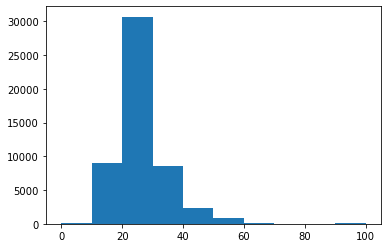

In [24]:
plt.hist(cleaned_users.age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100])

In [25]:
age_bins = ((cleaned_users.age // 10) * 10).value_counts().reset_index().sort_values(by='index')
age_bins

,index,age
7,0.0,162
1,10.0,9073
0,20.0,30672
2,30.0,8605
3,40.0,2395
4,50.0,843
6,60.0,192
8,70.0,36
10,80.0,24
9,90.0,32


### Define Age Range

In [26]:
cleaned_users.head()

,user_id,age,country
2,00007a47085b9aab8af55f52ec8846ac479ac4fe,28.0,United States
8,0001a57568309b287363e72dc682e9a170ba6dc2,23.0,United States
10,00024b5b85c40f990c28644d53257819980bf6bb,23.0,United States
14,0002dd2154072434d26e5409faa591bfb260a01e,30.0,United States
15,00032c7933e0eb05f2258f1147ef81a90f2d4d6c,26.0,United States


In [27]:
def extract_users(df, age, age_range):
    start = age - age_range
    end = age + age_range
    users_selected = df[(df['age'] >= start) & (df['age'] <= end)].reset_index(drop=True)
    return users_selected

In [28]:
extract_users(cleaned_users, 55, 5)

,user_id,age,country
0,000912716c36131c4d8591da475c93337e7196a7,57.0,United States
1,00496ca782bbd63ef3fb5ac7db30cc7bef508e22,50.0,United States
2,00f251370e500f9a3a93f38d8610fe38f6bbb3f5,51.0,United States
3,01870107318a18555a17bc7ed62aa4cbf7cf27f6,58.0,United States
4,01e217e8c9b0babb4f882588d1e25d72788ea18e,55.0,United States
...,...,...,...
872,ff7cc3cd351f27a04d448d51e51850958651e01b,55.0,United States
873,ffa0ec4145d448cc3cbde94a672a4dfd7cb9c4f5,53.0,United States
874,ffd606bb03cfeed357d5236e4dcb9302646809e2,53.0,United States
875,ffdcf32821979d43b94346a67985649296296565,50.0,United States


### Apply Age Range to Artist Listening History

In [29]:
chosen_users = extract_users(cleaned_users, 55, 5)

In [30]:
cleaned_history = lastfm_usersong[['user_id', 'artist_id', 'artist_name', 'plays']].dropna().reset_index(drop=True)

In [31]:
cleaned_history.head()

,user_id,artist_id,artist_name,plays
0,00000c289a1829a808ac09c00daf10bc3c4e223b,3bd73256-3905-4f3a-97e2-8b341527f805,betty blowtorch,2137
1,00000c289a1829a808ac09c00daf10bc3c4e223b,f2fb0ff0-5679-42ec-a55c-15109ce6e320,die Ärzte,1099
2,00000c289a1829a808ac09c00daf10bc3c4e223b,b3ae82c2-e60b-4551-a76d-6620f1b456aa,melissa etheridge,897
3,00000c289a1829a808ac09c00daf10bc3c4e223b,3d6bbeb7-f90e-4d10-b440-e153c0d10b53,elvenking,717
4,00000c289a1829a808ac09c00daf10bc3c4e223b,bbd2ffd7-17f4-4506-8572-c1ea58c3f9a8,juliette & the licks,706


In [32]:
def extract_histories(df, users):
    extracted_history = df[df['user_id'].isin(users['user_id'])]
    return extracted_history

In [33]:
chosen_history = extract_histories(cleaned_history, chosen_users)

In [34]:
chosen_users

,user_id,age,country
0,000912716c36131c4d8591da475c93337e7196a7,57.0,United States
1,00496ca782bbd63ef3fb5ac7db30cc7bef508e22,50.0,United States
2,00f251370e500f9a3a93f38d8610fe38f6bbb3f5,51.0,United States
3,01870107318a18555a17bc7ed62aa4cbf7cf27f6,58.0,United States
4,01e217e8c9b0babb4f882588d1e25d72788ea18e,55.0,United States
...,...,...,...
872,ff7cc3cd351f27a04d448d51e51850958651e01b,55.0,United States
873,ffa0ec4145d448cc3cbde94a672a4dfd7cb9c4f5,53.0,United States
874,ffd606bb03cfeed357d5236e4dcb9302646809e2,53.0,United States
875,ffdcf32821979d43b94346a67985649296296565,50.0,United States


In [35]:
chosen_history

,user_id,artist_id,artist_name,plays
2633,000912716c36131c4d8591da475c93337e7196a7,02294a9c-c924-4a59-877d-3ee98ee05ae1,sexteto mayor,29
2634,000912716c36131c4d8591da475c93337e7196a7,4d483147-c871-48c4-8470-85e5a66381c5,celtic woman,24
2635,000912716c36131c4d8591da475c93337e7196a7,7629ca32-b4fd-4598-aa20-956552826ee3,patrick williams,24
2636,000912716c36131c4d8591da475c93337e7196a7,4f8ef4a3-40fa-46b5-8773-97686a8424f4,Édith piaf,18
2637,000912716c36131c4d8591da475c93337e7196a7,3c004c98-aab6-4b63-a2df-e07c98e73b0a,josé feliciano,13
...,...,...,...,...
17305419,fff1e43c0de9a713783f1c92f65afb0b8b74498b,fcfa9543-e113-4ef9-9ef6-455ba4cbe7af,jim croce,6
17305420,fff1e43c0de9a713783f1c92f65afb0b8b74498b,c3649208-0ebe-449b-b1d7-4bd6c560f109,john fogerty,6
17305421,fff1e43c0de9a713783f1c92f65afb0b8b74498b,1efadc05-01b5-4a39-9c6f-da5c975276dd,mary gauthier,6
17305422,fff1e43c0de9a713783f1c92f65afb0b8b74498b,b9ffd0e7-7f95-46db-bc1c-8094d459f084,nanci griffith,6


### Working with Spotipy

In [36]:
import spotipy
from spotipy.oauth2 import SpotifyOAuth

In [37]:
def get_top_n(response):
    top_artists = []
    for item in response['items']:
        top_artists.append(item['name'])
    return top_artists

In [38]:
def parse_playlist_ids(response):
    playlist_ids = []
    for item in response['items']:
        pid = item['id']
        playlist_ids.append(pid)
    return playlist_ids

In [39]:
def parse_track_info(response):
    track_names = []
    artist_names = []
    album_names = []

    for item in r['items']:

        # Gets the name of the track
        track = item['track']['name']
        # Gets the name of the album
        album = item['track']['album']['name']
        # Gets the name of the first artist listed under album artists
        artist = item['track']['album']['artists'][0]['name']

        track_names.append(track)
        album_names.append(album)
        artist_names.append(artist)

    return track_names, album_names, artist_names

### Building the Recommender

In [40]:
chosen_users = extract_users(cleaned_users, 55, 5)

In [41]:
chosen_history = extract_histories(cleaned_history, chosen_users)

In [42]:
chosen_history

,user_id,artist_id,artist_name,plays
2633,000912716c36131c4d8591da475c93337e7196a7,02294a9c-c924-4a59-877d-3ee98ee05ae1,sexteto mayor,29
2634,000912716c36131c4d8591da475c93337e7196a7,4d483147-c871-48c4-8470-85e5a66381c5,celtic woman,24
2635,000912716c36131c4d8591da475c93337e7196a7,7629ca32-b4fd-4598-aa20-956552826ee3,patrick williams,24
2636,000912716c36131c4d8591da475c93337e7196a7,4f8ef4a3-40fa-46b5-8773-97686a8424f4,Édith piaf,18
2637,000912716c36131c4d8591da475c93337e7196a7,3c004c98-aab6-4b63-a2df-e07c98e73b0a,josé feliciano,13
...,...,...,...,...
17305419,fff1e43c0de9a713783f1c92f65afb0b8b74498b,fcfa9543-e113-4ef9-9ef6-455ba4cbe7af,jim croce,6
17305420,fff1e43c0de9a713783f1c92f65afb0b8b74498b,c3649208-0ebe-449b-b1d7-4bd6c560f109,john fogerty,6
17305421,fff1e43c0de9a713783f1c92f65afb0b8b74498b,1efadc05-01b5-4a39-9c6f-da5c975276dd,mary gauthier,6
17305422,fff1e43c0de9a713783f1c92f65afb0b8b74498b,b9ffd0e7-7f95-46db-bc1c-8094d459f084,nanci griffith,6


In [43]:
most_occurrence = pd.DataFrame(chosen_history.groupby('artist_name')['plays'].count().sort_values(ascending=False))

In [44]:
most_occurrence[:20]

,plays
artist_name,
the beatles,318
the rolling stones,212
bob dylan,185
the who,145
pink floyd,135
neil young,134
led zeppelin,133
fleetwood mac,125
simon & garfunkel,122


### Working with Spotipy

In [45]:
# Application information
client_id = 'f78a4f4cfe9c40ea8fe346b0576e98ea'
client_secret = 'c26db2d4c1fb42d79dc99945b2360ab4'

# Temporary placeholder until we actually get a website going
redirect_uri = 'https://google.com/'

# The permissions that our application will ask for
scope = " ".join(['playlist-modify-public',"user-top-read","user-read-recently-played","playlist-read-private"])

username = 'gazzaniga3'

In [46]:
%%cmd

SET SPOTIPY_CLIENT_ID=client_id
SET SPOTIPY_CLIENT_SECRET=client_secret
SET SPOTIPY_REDIRECT_URI=redirect_uri

Microsoft Windows [Version 10.0.19042.746]
(c) 2020 Microsoft Corporation. All rights reserved.

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>
C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_CLIENT_ID=client_id

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_CLIENT_SECRET=client_secret

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>SET SPOTIPY_REDIRECT_URI=redirect_uri

C:\Users\sarat\GitHub\DSC180b-Capstone\notebooks>

In [47]:
print(os.environ.get('SPOTIPY_CLIENT_ID'))
print(os.environ.get('SPOTIPY_CLIENT_SECRET'))
print(os.environ.get('SPOTIPY_REDIRECT_URI'))

None
None
None


In [48]:
# Oauth object    
sp_oauth = spotipy.oauth2.SpotifyOAuth(client_id, client_secret, redirect_uri, scope=scope, username=username)

# Force auth every time
authUrl = sp_oauth.get_authorize_url()
authUrl

'https://accounts.spotify.com/authorize?client_id=f78a4f4cfe9c40ea8fe346b0576e98ea&response_type=code&redirect_uri=https%3A%2F%2Fgoogle.com%2F&scope=playlist-modify-public+playlist-read-private+user-read-recently-played+user-top-read'

In [49]:
try:
    sp = spotipy.Spotify(auth_manager=sp_oauth)
except:
    os.remove(f'.cache-{username}')
    sp = spotipy.Spotify(auth_manager=sp_oauth)


In [50]:
get_artist = sp.search("the beatles")['tracks']['items'][0]['album']['artists'][0]['uri']

In [51]:
get_artist

'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'

In [52]:
get_tracks = sp.artist_top_tracks(get_artist)

In [53]:
get_tracks

{'tracks': [{'album': {'album_type': 'album',
    'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2'},
      'href': 'https://api.spotify.com/v1/artists/3WrFJ7ztbogyGnTHbHJFl2',
      'id': '3WrFJ7ztbogyGnTHbHJFl2',
      'name': 'The Beatles',
      'type': 'artist',
      'uri': 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'}],
    'external_urls': {'spotify': 'https://open.spotify.com/album/0ETFjACtuP2ADo6LFhL6HN'},
    'href': 'https://api.spotify.com/v1/albums/0ETFjACtuP2ADo6LFhL6HN',
    'id': '0ETFjACtuP2ADo6LFhL6HN',
    'images': [{'height': 640,
      'url': 'https://i.scdn.co/image/ab67616d0000b273dc30583ba717007b00cceb25',
      'width': 640},
     {'height': 300,
      'url': 'https://i.scdn.co/image/ab67616d00001e02dc30583ba717007b00cceb25',
      'width': 300},
     {'height': 64,
      'url': 'https://i.scdn.co/image/ab67616d00004851dc30583ba717007b00cceb25',
      'width': 64}],
    'name': 'Abbey Road (Remastered)',
    'releas

In [54]:
top_tracks = []

In [55]:
for track in get_tracks['tracks'][:10]:
    top_tracks.append(track['name'])

In [56]:
top_tracks

['Here Comes The Sun - Remastered 2009',
 'Come Together - Remastered 2009',
 'Let It Be - Remastered 2009',
 'Yesterday - Remastered 2009',
 'Hey Jude - Remastered 2015',
 'Blackbird - Remastered 2009',
 'Twist And Shout - Remastered 2009',
 'In My Life - Remastered 2009',
 'I Want To Hold Your Hand - Remastered 2015',
 'Help! - Remastered 2009']

In [57]:
get_related_artists = sp.artist_related_artists(get_artist)

In [58]:
get_related_artists

{'artists': [{'external_urls': {'spotify': 'https://open.spotify.com/artist/4x1nvY2FN8jxqAFA0DA02H'},
   'followers': {'href': None, 'total': 3909829},
   'genres': ['album rock',
    'art rock',
    'beatlesque',
    'classic rock',
    'folk rock',
    'mellow gold',
    'rock'],
   'href': 'https://api.spotify.com/v1/artists/4x1nvY2FN8jxqAFA0DA02H',
   'id': '4x1nvY2FN8jxqAFA0DA02H',
   'images': [{'height': 640,
     'url': 'https://i.scdn.co/image/bb44a853b1bae0d3ad25816af544085791f09600',
     'width': 640},
    {'height': 320,
     'url': 'https://i.scdn.co/image/2b6ffb524bdaaba9c8d690368d4eed9c60fce0dd',
     'width': 320},
    {'height': 160,
     'url': 'https://i.scdn.co/image/af2e1986a819b2c79a3ba67ee10c17fc93374818',
     'width': 160}],
   'name': 'John Lennon',
   'popularity': 77,
   'type': 'artist',
   'uri': 'spotify:artist:4x1nvY2FN8jxqAFA0DA02H'},
  {'external_urls': {'spotify': 'https://open.spotify.com/artist/7FIoB5PHdrMZVC3q2HE5MS'},
   'followers': {'href': Non

In [59]:
related_artists = []
for artist in get_related_artists['artists'][:10]:
    related_artists.append(artist['name'])

In [60]:
related_artists

['John Lennon',
 'George Harrison',
 'Paul McCartney',
 'The Beach Boys',
 'Ringo Starr',
 'The Kinks',
 'The Rolling Stones',
 'Bob Dylan',
 'The Hollies',
 'Simon & Garfunkel']

In [61]:
artist = sp.artist(get_artist)

In [62]:
artist

{'external_urls': {'spotify': 'https://open.spotify.com/artist/3WrFJ7ztbogyGnTHbHJFl2'},
 'followers': {'href': None, 'total': 18510852},
 'genres': ['beatlesque',
  'british invasion',
  'classic rock',
  'merseybeat',
  'psychedelic rock',
  'rock'],
 'href': 'https://api.spotify.com/v1/artists/3WrFJ7ztbogyGnTHbHJFl2',
 'id': '3WrFJ7ztbogyGnTHbHJFl2',
 'images': [{'height': 640,
   'url': 'https://i.scdn.co/image/6b2a709752ef9c7aaf0d270344157f6cd2e0f1a7',
   'width': 640},
  {'height': 320,
   'url': 'https://i.scdn.co/image/1047bf172446f2a815a99ab0a0395099d621be51',
   'width': 320},
  {'height': 160,
   'url': 'https://i.scdn.co/image/0561b59a91a5e904ad2d192747715688d5f05012',
   'width': 160}],
 'name': 'The Beatles',
 'popularity': 89,
 'type': 'artist',
 'uri': 'spotify:artist:3WrFJ7ztbogyGnTHbHJFl2'}

In [63]:
artist_genres = artist['genres']

In [64]:
artist_genres

['beatlesque',
 'british invasion',
 'classic rock',
 'merseybeat',
 'psychedelic rock',
 'rock']

### Build Dataset Features

In [65]:
def get_genres(row):
    artist = row['artist_name']
    uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
    artist_info = sp.artist(uri)
    genres = artist_info['genres']
    row['genres'] = genres
    return row

In [66]:
def get_related_artist(uri):
    related = sp.artist_related_artists(uri)
    related_lst = []
    for artist in related['artists'][:5]:
        related_lst.append(artist['name'])
    return related_lst

In [67]:
def get_top_tracks(uri):
    top_tracks = sp.artist_top_tracks(uri)
    top_lst = []
    for track in top_tracks['tracks'][:5]:
        top_lst.append(track['name'])
    return top_lst

In [68]:
def extract_features(row):
    artist = row['artist_name']
    uri = sp.search(artist)['tracks']['items'][0]['album']['artists'][0]['uri']
    related_artists_extracted = get_related_artist(uri)
    top_tracks_extracted = get_top_tracks(uri)
    artist_info = sp.artist(uri)
    genres = artist_info['genres']
    popularity = artist_info['popularity']
    followers = artist_info['followers']['total']
    row['uri'] = uri
    row['genres'] = genres
    row['related_artists'] = related_artists_extracted
    row['top_tracks'] = top_tracks_extracted
    row['popularity'] = popularity
    row['followers'] = followers
    return row

In [69]:
top_artists = most_occurrence

In [70]:
top_artists.reset_index(level=0, inplace=True)

In [71]:
top_artists = top_artists[top_artists['plays'] > 10]

In [72]:
top_artists

,artist_name,plays
0,the beatles,318
1,the rolling stones,212
2,bob dylan,185
3,the who,145
4,pink floyd,135
...,...,...
777,joshua radin,11
778,whitney houston,11
779,george duke,11
780,vince gill,11


In [73]:
top_artist_df = top_artists.apply(extract_features, axis=1)

In [74]:
top_artist_df

,artist_name,plays,uri,genres,related_artists,top_tracks,popularity,followers
0,the beatles,318,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,"[beatlesque, british invasion, classic rock, m...","[John Lennon, George Harrison, Paul McCartney,...","[Here Comes The Sun - Remastered 2009, Come To...",89,18510852
1,the rolling stones,212,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,"[british invasion, classic rock, rock]","[The Animals, Jimi Hendrix, Cream, Faces, The ...","[Paint It, Black, (I Can't Get No) Satisfactio...",83,9712650
2,bob dylan,185,spotify:artist:4UXqAaa6dQYAk18Lv7PEgX,"[emo, modern rock, pop punk]","[Panic! At The Disco, All Time Low, My Chemica...","[Centuries, Sugar, We're Goin Down, Summer Day...",83,8530765
3,the who,145,spotify:artist:67ea9eGLXYMsO2eYQRui3w,"[album rock, art rock, british invasion, class...","[The Yardbirds, Pete Townshend, The Kinks, Cre...","[Baba O'Riley, Behind Blue Eyes, Pinball Wizar...",73,3766338
4,pink floyd,135,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,"[album rock, art rock, classic rock, progressi...","[David Gilmour, Roger Waters, Jethro Tull, Kin...","[Wish You Were Here, Another Brick in the Wall...",83,13811349
...,...,...,...,...,...,...,...,...
777,joshua radin,11,spotify:artist:7omzannyG2lfDqP5xyZo34,"[acoustic pop, indie folk, indiecoustica, neo ...","[Cary Brothers, Brett Dennen, Matt Nathanson, ...","[Here, Right Now, Only You, Better Life, Winte...",60,333458
778,whitney houston,11,spotify:artist:6XpaIBNiVzIetEPCWDvAFP,"[dance pop, pop, urban contemporary]","[Toni Braxton, Janet Jackson, En Vogue, Luther...","[I Wanna Dance with Somebody (Who Loves Me), H...",81,6222592
779,george duke,11,spotify:artist:7BxJEL8I7OoAMGyPWn1cPS,"[indie jazz, indie soul, jazz rap, neo r&b]","[DJ Harrison, Jitwam, Elaquent, Swarvy, Mndsgn]","[The Circle, Intentions, Oh Word, Phone Won't ...",48,25148
780,vince gill,11,spotify:artist:3IhWQSrLj8EJjdvjFTpCyo,"[country, country rock, oklahoma country]","[Collin Raye, Pam Tillis, Mark Chesnutt, Shena...",[I Don't Need Your Rockin' Chair - Version w/s...,65,355370


In [75]:
selection = ['country']

In [76]:
top_artist_df = top_artist_df[top_artist_df.genres.apply(lambda x: bool(set(x) & set(selection)))]

In [77]:
top_artist_df

,artist_name,plays,uri,genres,related_artists,top_tracks,popularity,followers
0,the beatles,318,spotify:artist:3WrFJ7ztbogyGnTHbHJFl2,"[beatlesque, british invasion, classic rock, m...","[John Lennon, George Harrison, Paul McCartney,...","[Here Comes The Sun - Remastered 2009, Come To...",89,18510852
1,the rolling stones,212,spotify:artist:22bE4uQ6baNwSHPVcDxLCe,"[british invasion, classic rock, rock]","[The Animals, Jimi Hendrix, Cream, Faces, The ...","[Paint It, Black, (I Can't Get No) Satisfactio...",83,9712650
3,the who,145,spotify:artist:67ea9eGLXYMsO2eYQRui3w,"[album rock, art rock, british invasion, class...","[The Yardbirds, Pete Townshend, The Kinks, Cre...","[Baba O'Riley, Behind Blue Eyes, Pinball Wizar...",73,3766338
4,pink floyd,135,spotify:artist:0k17h0D3J5VfsdmQ1iZtE9,"[album rock, art rock, classic rock, progressi...","[David Gilmour, Roger Waters, Jethro Tull, Kin...","[Wish You Were Here, Another Brick in the Wall...",83,13811349
5,neil young,134,spotify:artist:6v8FB84lnmJs434UJf2Mrm,"[album rock, canadian singer-songwriter, class...","[Crosby, Stills, Nash & Young, Crosby, Stills ...","[Heart of Gold - 2009 Remaster, Harvest Moon, ...",74,2093817
...,...,...,...,...,...,...,...,...
759,trisha yearwood,11,spotify:artist:3XlIhgydjvC4EniPFZT20j,"[contemporary country, country, country dawn, ...","[Jo Dee Messina, Pam Tillis, Martina McBride, ...","[She's In Love With The Boy - Single Version, ...",61,798830
763,bob seger & the silver bullet band,11,spotify:artist:485uL27bPomh29R4JmQehQ,"[album rock, blues rock, classic rock, country...","[Joe Walsh, Steve Miller Band, John Mellencamp...","[Old Time Rock & Roll, Night Moves, Against Th...",71,1196770
766,audioslave,11,spotify:artist:2ziB7fzrXBoh1HUPS6sVFn,"[alternative metal, alternative rock, nu metal...","[Velvet Revolver, Alice In Chains, Stone Templ...","[Like a Stone, Be Yourself, Show Me How to Liv...",72,3107007
772,john mayall & the bluesbreakers,11,spotify:artist:2ScuQMRWThcifBRIvNDFDC,"[blues, blues rock, british blues, british inv...","[Peter Green, John Mayall, Johnny Winter, Ten ...","[All Your Love - Stereo, Hideaway - Mono Instr...",53,280566


In [78]:
top_tracks = pd.DataFrame(top_artist_df['top_tracks'].explode().reset_index(drop=True))

In [79]:
top_tracks.columns = ['track_name']

In [80]:
top_tracks = top_tracks[:100]

In [81]:
top_tracks

,track_name
0,Here Comes The Sun - Remastered 2009
1,Come Together - Remastered 2009
2,Let It Be - Remastered 2009
3,Yesterday - Remastered 2009
4,Hey Jude - Remastered 2015
...,...
95,Fire and Rain - 2019 Remaster
96,How Sweet It Is (To Be Loved By You) - 2019 Re...
97,Carolina in My Mind
98,You've Got a Friend - 2019 Remaster


In [82]:
def extract_track_features(row):
    uri = sp.search(row)['tracks']['items'][0]['uri']
    features = sp.audio_features(uri)[0]
    dance = features['danceability']
    energy = features['energy']
    key = features['key']
    loudness = features['loudness']
    mode = features['mode']
    speech = features['speechiness']
    acoustic = features['acousticness']
    instrument = features['instrumentalness']
    live = features['liveness']
    valence = features['valence']
    tempo = features['tempo']
    return uri, dance, energy, key, loudness, mode, speech, acoustic, instrument, live, valence, tempo

In [83]:
top_tracks['uri'], top_tracks['danceability'], top_tracks['energy'], top_tracks['key'], top_tracks['loudness'], top_tracks['mode'], top_tracks['speechiness'], top_tracks['acousticness'], top_tracks['instrumentalness'], top_tracks['liveness'], top_tracks['valence'], top_tracks['valence'] = zip(*top_tracks['track_name'].apply(extract_track_features))

In [84]:
top_tracks

,track_name,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence
0,Here Comes The Sun - Remastered 2009,spotify:track:6dGnYIeXmHdcikdzNNDMm2,0.557,0.540,9,-10.484,1,0.0347,0.0339,0.002480,0.1790,129.171
1,Come Together - Remastered 2009,spotify:track:2EqlS6tkEnglzr7tkKAAYD,0.533,0.376,9,-11.913,0,0.0393,0.0302,0.248000,0.0926,165.007
2,Let It Be - Remastered 2009,spotify:track:7iN1s7xHE4ifF5povM6A48,0.443,0.403,0,-8.339,1,0.0322,0.6310,0.000000,0.1110,143.462
3,Yesterday - Remastered 2009,spotify:track:3BQHpFgAp4l80e1XslIjNI,0.332,0.179,5,-11.830,1,0.0326,0.8790,0.000000,0.0886,96.529
4,Hey Jude - Remastered 2015,spotify:track:0aym2LBJBk9DAYuHHutrIl,0.386,0.607,10,-7.700,1,0.0261,0.0112,0.000014,0.0880,147.207
...,...,...,...,...,...,...,...,...,...,...,...,...
95,Fire and Rain - 2019 Remaster,spotify:track:1oht5GevPN9t1T3kG1m1GO,0.597,0.271,5,-17.293,1,0.0394,0.7660,0.011900,0.0933,76.271
96,How Sweet It Is (To Be Loved By You) - 2019 Re...,spotify:track:75Nlnd9AJ4CYrLXgWGsuTF,0.764,0.628,0,-10.961,1,0.0480,0.3360,0.000000,0.0977,109.008
97,Carolina in My Mind,spotify:track:2T5Ch09nefwckOu5NQvjIk,0.579,0.267,4,-15.110,1,0.0348,0.1180,0.000562,0.1320,74.899
98,You've Got a Friend - 2019 Remaster,spotify:track:6zV8IpLvw0tkRSVCFQJB1y,0.689,0.200,9,-18.634,1,0.0309,0.7950,0.032700,0.0893,91.787


### Building CF Algorithm

### Implicit

In [93]:
import scipy.sparse as sparse
import numpy as np
import random
import implicit
from sklearn.preprocessing import MinMaxScaler

In [94]:
ap = cleaned_history

In [159]:
artist_rank = ap.groupby(['artist_name']) \
  .agg({'user_id' : 'count', 'plays' : 'sum'}) \
  .rename(columns={"user_id" : 'totalUniqueUsers', "plays" : "totalArtistPlays"}) \
  .sort_values(['totalArtistPlays'], ascending=False)
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays'] / artist_rank['totalUniqueUsers']

In [161]:
ap = ap.join(artist_rank, on="artist_name", how="inner") \
  .sort_values(['plays'], ascending=False)

In [162]:
pc = ap.plays
play_count_scaled = (pc - pc.min()) / (pc.max() - pc.min())
ap = ap.assign(playCountScaled=play_count_scaled)

In [163]:
ap

,user_id,artist_id,artist_name,plays,playCountScaled,totalUniqueUsers,totalArtistPlays,avgUserPlays
9530415,8d0384537845e7f2b1b8b3e8a9f67eb8d9439794,dcaa4f81-bfb7-44eb-8594-4e74f004b6e4,nofx,419157,1.000000,10471,5025614,479.955496
1416755,14ea4c6f3c2e86b4937f1158bd13d3173d780bd7,5e6c760b-42e0-4df4-a221-0269355da00a,dean martin,288375,0.687987,2594,655025,252.515420
12461517,b88d16f3ebdad0bf701ecd46cf4725ea31911849,40f5d9e4-2de7-4f2d-ad41-e31a9a9fea27,the smiths,272359,0.649777,21275,6408722,301.232526
5089314,4b79df05a80b733e6422e52e5d1f25b50cd3aadb,ab309b83-904f-4e2c-8d11-a0223bba51f9,dir en grey,270122,0.644440,3705,2814331,759.603509
12619091,baee6143fb184f2014f05c737c28cd57d6d0486f,79239441-bfd5-4981-a70c-55c3f15c1287,madonna,242328,0.578131,25469,7633843,299.730771
...,...,...,...,...,...,...,...,...
15384487,e38dce72a83f24b2867f2962950abb00d9f75334,fd9c10fd-dc64-4fef-be42-fcc80ef1ff32,the shortwave set,1,0.000000,255,36504,143.152941
6279617,5cf54dafad09231719baf946691d99ac26133f1b,8d2651e1-f539-4492-957a-8b4dc4c5d9b9,mississippi fred mcdowell,1,0.000000,286,28981,101.332168
6865040,659fffa686888fa3e0c277d59c1d98e4f8784275,98164029-9cbf-4516-85ca-df2686dba0d8,funkerman,1,0.000000,421,14354,34.095012
1601935,17a8d921b4aeaac546618afe55cd5ac992c59dff,a4a68762-ad95-4e81-ab01-1ff70c27f41a,penumbra,1,0.000000,414,71082,171.695652


In [97]:
ap = ap.drop_duplicates()
grouped_df = ap.groupby(['user_id', 'artist_id', 'artist_name']).sum().reset_index()

In [98]:
grouped_df

,user_id,artist_id,artist_name,plays,playCountScaled
0,00000c289a1829a808ac09c00daf10bc3c4e223b,0639533a-0402-40ba-b6e0-18b067198b73,lunachicks,403,0.000959
1,00000c289a1829a808ac09c00daf10bc3c4e223b,0fb62639-4143-443b-8779-6867a1d08230,sandra nasic,183,0.000434
2,00000c289a1829a808ac09c00daf10bc3c4e223b,144ef525-85e9-40c3-8335-02c32d0861f3,john mayer,182,0.000432
3,00000c289a1829a808ac09c00daf10bc3c4e223b,21f3573f-10cf-44b3-aeaa-26cccd8448b5,the black dahlia murder,507,0.001207
4,00000c289a1829a808ac09c00daf10bc3c4e223b,295a3ae3-9e81-4cff-a36f-8d48b8fb4dcf,all:my:faults,288,0.000685
...,...,...,...,...,...
17309309,"sep 20, 2008",ef656595-bbe8-4386-8953-be8df9f54472,friendly fires,43,0.000100
17309310,"sep 20, 2008",f181961b-20f7-459e-89de-920ef03c7ed0,the strokes,30,0.000069
17309311,"sep 20, 2008",f1ce0a98-fed9-4337-b817-398720ff6bd8,test icicles,16,0.000036
17309312,"sep 20, 2008",f6f2326f-6b25-4170-b89d-e235b25508e8,sigur rós,10,0.000021


In [99]:
grouped_df['artist_name'] = grouped_df['artist_name'].astype("category")
grouped_df['user_id'] = grouped_df['user_id'].astype("category")
grouped_df['artist_id'] = grouped_df['artist_id'].astype("category")
grouped_df['user_id'] = grouped_df['user_id'].cat.codes
grouped_df['artist_id'] = grouped_df['artist_id'].cat.codes

In [100]:
sparse_artist_user = sparse.csr_matrix((grouped_df['playCountScaled'].astype(float), (grouped_df['artist_id'], grouped_df['user_id'])))

In [101]:
sparse_user_artist = sparse.csr_matrix((grouped_df['playCountScaled'].astype(float), (grouped_df['user_id'], grouped_df['artist_id'])))

In [102]:
model = implicit.als.AlternatingLeastSquares(factors=20, regularization=0.1, iterations=50)

In [103]:
import ipywidgets as widgets

In [104]:
from tqdm import tqdm

In [105]:
from ipywidgets import FloatProgress

In [106]:
alpha = 15
data = (sparse_artist_user * alpha).astype('double')

In [107]:
model.fit(data)

In [244]:
content_id = 40
n_similar = 10

In [245]:
user_vecs = model.user_factors
artist_vecs = model.item_factors

In [246]:
artist_norms = np.sqrt((artist_vecs * artist_vecs).sum(axis=1))

In [247]:
scores = artist_vecs.dot(artist_vecs[content_id]) / artist_norms

In [248]:
top_idx = np.argpartition(scores, -n_similar)[-n_similar:]

In [249]:
similar = sorted(zip(top_idx, scores[top_idx] / artist_norms[content_id]), key=lambda x: -x[1])

In [250]:
for content in similar:
    idx, score = content
    print(grouped_df.artist_name.loc[grouped_df.artist_id == idx].iloc[0])

alston
tom mangan
playstation
raj montana band
danuta rinn
old skool junx
funky filon
charlie murphy
aneros male g-spot stimulator
nahuatl


In [264]:
def recommend(user_id, sparse_user_artist, user_vecs, artist_vecs, num_contents=10):
    user_interactions = sparse_user_artist[user_id,:].toarray()
    user_interactions = user_interactions.reshape(-1) + 1
    user_interactions[user_interactions > 1] = 0
    rec_vector = user_vecs[user_id,:].dot(artist_vecs.T).toarray()
    min_max = MinMaxScaler()
    rec_vector_scaled = min_max.fit_transform(rec_vector.reshape(-1,1))[:,0]
    recommend_vector = user_interactions * rec_vector_scaled
    content_idx = np.argsort(recommend_vector)[::-1][:num_contents]
    artists = []
    scores = []
    for idx in content_idx:
        artists.append(grouped_df.artist_name.loc[grouped_df.artist_id == idx].iloc[0])
        scores.append(recommend_vector[idx])
    recommendations = pd.DataFrame({'title': artists, 'score': scores})
    return recommendations

In [265]:
# Get the trained person and content vectors. We convert them to csr matrices
user_vecs = sparse.csr_matrix(model.user_factors)
artist_vecs = sparse.csr_matrix(model.item_factors)

# Create recommendations for person with id 50
user_id = 100

recommendations = recommend(user_id, sparse_user_artist, user_vecs, artist_vecs)

print(recommendations)

             title     score
0       the smiths  1.000000
1        morrissey  0.930729
2        radiohead  0.886441
3      the beatles  0.751534
4       pink floyd  0.694378
5     depeche mode  0.526925
6             nofx  0.510690
7  nine inch nails  0.494400
8             muse  0.440774
9     bad religion  0.435559
